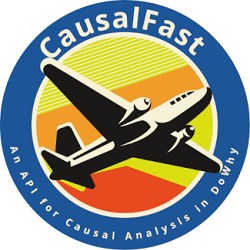
<h3>Causal Estimand Tutorials</h3><br>
Use this notebook to model the three types of causal estimand used by DoWhy<br>

***cf.makegraph() has 3 primary functions***
 1.  Make a Causal Graph DAG<br>
 2.  Make Causal Model for DoWhy/Simulator<br>
 3.  Run Tutorials of DoWhy Estimand: Frontdoor, Backdoor, Instrumental Variable (IV)

In [1]:
#!pip install -i https://test.pypi.org/simple/ causalfast
import causalfast as cf
import pandas as pd
cf.__version__
#cf.makegraph()  #Run this for assistance

'0.2.5'

<h3>Step 1: Load an Estimand Model using the Tutorial</h3>

CausalFast makegraph() Tutorial
____________________________________________
This function returns a tuple: 
makegraph[0] is a complete DoWhy model
makegraph[1] is a string in the DOT form to create a digraph
makegraph[2] is the dataset

____________________________________________
This graph shows the backdoor criterion.
treatment:              'X'
outcome:                'Y'
observed confounder:    'U'
data:
          X         Y         U
0  0.527402 -0.015028 -2.198658
1 -1.149567 -1.051520 -0.455034
2 -0.194027 -0.487116 -1.304545
3 -0.578846 -0.976418 -0.787990
4  0.477507  0.720304  1.852466

Start of Digraph code:

"""digraph {
                U;
                X;
                Y;
                U -> X;
                U -> Y;
                X -> Y;
                }
                """
:End of Digraph code.

Note: Copy the entire string, including start """ and end """.
Note: Do not wrap this string in quotes when assigning it to a varible for use in DoWhy CausalModel

Re

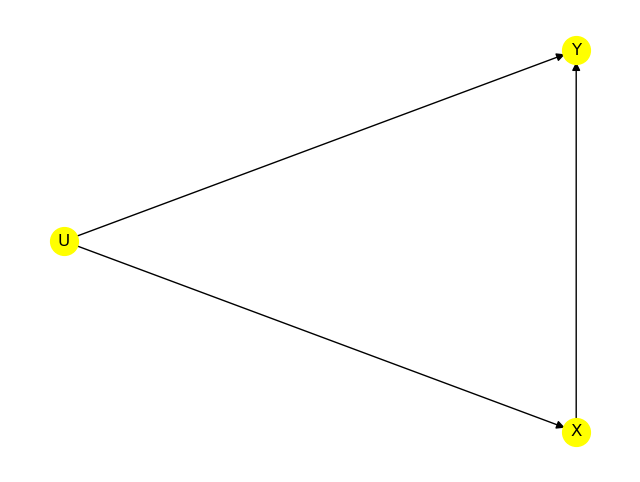

In [2]:
causalmodel = cf.makegraph(function='tutorial', model='backdoor')  #Try the other estimand models: 'frontdoor' & 'iv'

<h3>Step 2: Run CausalFast Simulator using the CausalModel Object</h3>

 1.  Load Causal model:   cf.simulator(causalmodel[0])<br>
 2.  Use default parameters or choose output, identifier, and estimator<br>
    - Note: If backdoor estimators are used for frontdoor or IV, the simulator will use defaults instead<br>
    - Note: Linear regression should only be used under OLS assumptions<br>
    - Note: Logistic regression (GLM and linearDRLearner) require a binary outcome variable<br>
    - Note: Propensity scores require both binary treatment and an observed common cause<br>

In [3]:
#cf.simulator()  #Run this for assistance

In [4]:
cf.simulator(causalmodel[0])
#cf.simulator(causalmodel[0],output='default',identifier='minimal-adjustment',estimator='backdoor.linear_regression')
#cf.simulator(causalmodel[0],output='limited',identifier='maximal-adjustment',estimator='backdoor.linear_regression')
#cf.simulator(causalmodel[0],output='full',identifier='exhaustive-search',estimator='backdoor.linear_regression')

Simulator Mode (Default DoWhy) Parameters: 
Identification Using: identifier=' default '
Estimation Using: estimator=' default '

backdoor defaults to the 'backdoor.linear_regression' estimation method.
Other backdoor estimation methods include: 
Logistic:   backdoor.generalized_linear_model
Logistic:   backdoor.econml.dr.LinearDRLearner
DoubleML:   backdoor.econml.dml.DML

Note: Propensity Scores Require a Binary Treatment Variable
Propensity: backdoor.propensity_score_stratification
Propensity: backdoor.propensity_score_matching
Propensity: backdoor.propensity_score_weighting

Detected Estimator method_name (DoWhy): ' backdoor.linear_regression '
Detected Estimator method_params (DoWhy):  None

*** Causal Estimate ***

## Identified estimand
Estimand type: EstimandType.NONPARAMETRIC_ATE

### Estimand : 1
Estimand name: backdoor
Estimand expression:
 d          
────(E[Y|U])
d[X]        
Estimand assumption 1, Unconfoundedness: If U→{X} and U→Y then P(Y|X,U,U) = P(Y|X,U)

## Realized 